<a href="https://colab.research.google.com/github/deeprajbrahma123/Wine-Quality-Analysis/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wine Quality Analysis**

##Importing of Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the dataset

In [ ]:
data_set=pd.read_csv('red_wine.csv')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


##Checking for any null values

In [ ]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [ ]:
data_set.isnull().sum().sum()

3

**We found 3 null values**

##Taking care of missing values

**Since 'total sulfur dioxide' and 'pH' are the variables to determine the quality of red wine, therefore mean is taken to take care of the missing values**

In [ ]:
data_set[data_set['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [ ]:
new_dataset=data_set.fillna(value=data_set['total sulfur dioxide'].mean())
new_dataset[data_set['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.8,10.5,5.0


In [ ]:
data_set[data_set['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [ ]:
new_dataset=data_set.fillna(value=data_set['pH'].mean())
new_dataset[data_set['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,3.498586,0.58,9.3,6.0


**Since 'quality'is a categorical data in our dataset of red wine, therefore mode is taken to take care of the missing values**

In [ ]:
data_set[data_set['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [ ]:
new_dataset=data_set.fillna(value=data_set['quality'].mode()[0])
new_dataset[data_set['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,5.0


**New data is store in a 'new_data' after taking care of the missing values**

In [ ]:
data_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [ ]:
new_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.407129,0.996747,3.499525,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.882290,0.001887,0.088664,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,5.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,5.000000,2.000000,14.900000,8.000000


In [ ]:
new_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**All missing values has been taken care**

##Visualizing the Dataset

Text(0.5, 1.0, 'Count VS Quality')

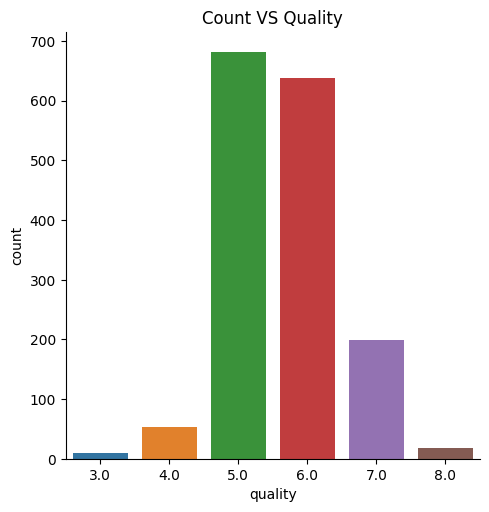

In [ ]:
#Count vs Quality
sns.catplot(x='quality',data=new_dataset,kind='count')
plt.title('Count VS Quality')

<Axes: title={'center': 'Fixed Acidity VS Quality'}, xlabel='quality', ylabel='fixed acidity'>

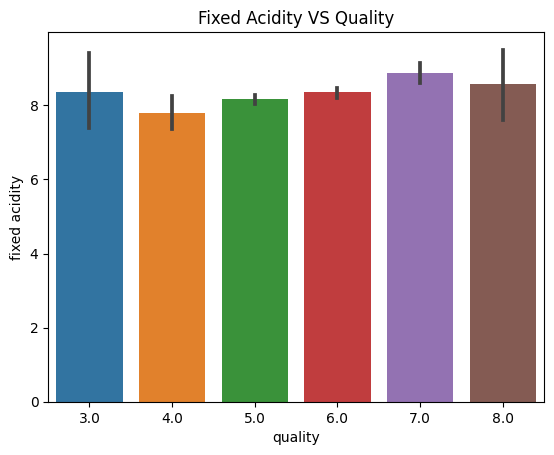

In [ ]:
#Fixed Acidity VS Quality
plot=plt.figure()
plt.title('Fixed Acidity VS Quality')
sns.barplot(x='quality',y='fixed acidity',data=new_dataset)

<Axes: title={'center': 'Volatile Acidity VS Quality'}, xlabel='quality', ylabel='volatile acidity'>

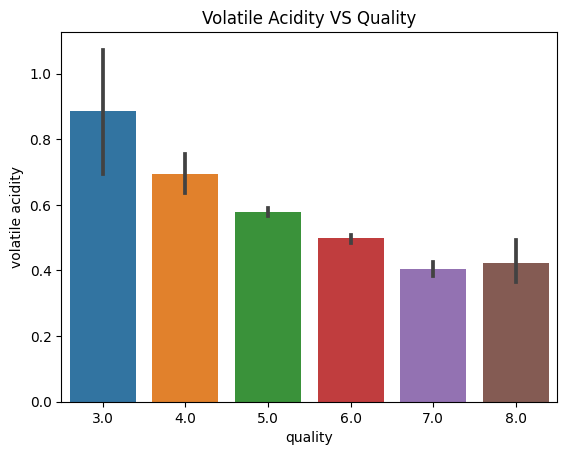

In [ ]:
#Volatile Acidity VS Quality
plot=plt.figure()
plt.title('Volatile Acidity VS Quality')
sns.barplot(x='quality',y='volatile acidity',data=new_dataset)

<Axes: title={'center': 'Citric acid VS Quality'}, xlabel='quality', ylabel='citric acid'>

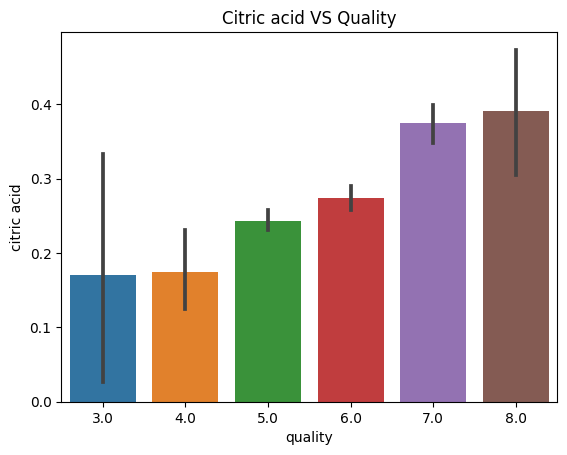

In [ ]:
#Citric acid VS Quality
plot=plt.figure()
plt.title('Citric acid VS Quality')
sns.barplot(x='quality',y='citric acid',data=new_dataset)

<Axes: title={'center': 'Residual sugar VS Quality'}, xlabel='quality', ylabel='residual sugar'>

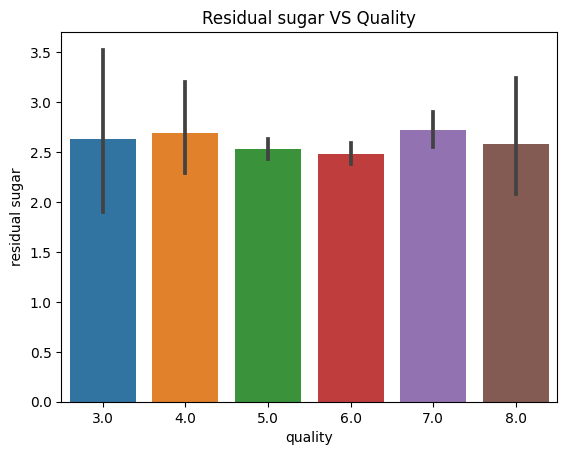

In [ ]:
#Residual sugar VS Quality
plot=plt.figure()
plt.title('Residual sugar VS Quality')
sns.barplot(x='quality',y='residual sugar',data=new_dataset)

<Axes: title={'center': 'Chlorides VS Quality'}, xlabel='quality', ylabel='chlorides'>

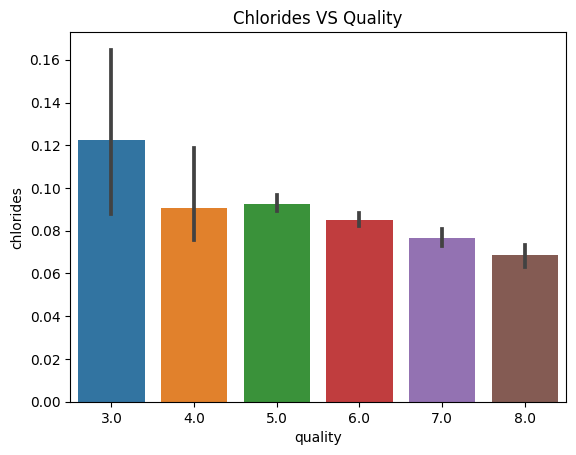

In [ ]:
#Chlorides VS Quality
plot=plt.figure()
plt.title('Chlorides VS Quality')
sns.barplot(x='quality',y='chlorides',data=new_dataset)

<Axes: title={'center': 'Free sulfur dioxide VS Quality'}, xlabel='quality', ylabel='free sulfur dioxide'>

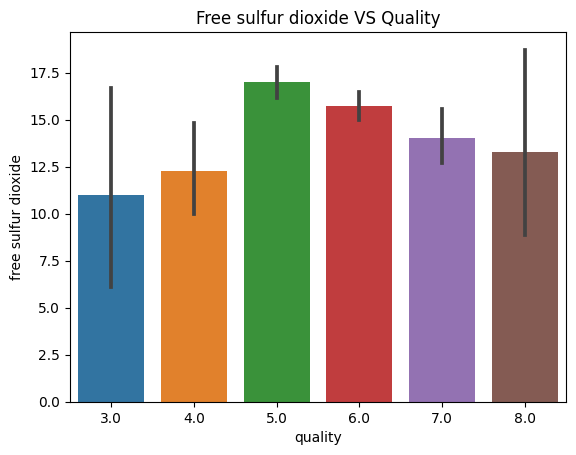

In [ ]:
#Free sulfur dioxide VS Quality
plot=plt.figure()
plt.title('Free sulfur dioxide VS Quality')
sns.barplot(x='quality',y='free sulfur dioxide',data=new_dataset)

<Axes: title={'center': 'total sulfur dioxide VS Quality'}, xlabel='quality', ylabel='total sulfur dioxide'>

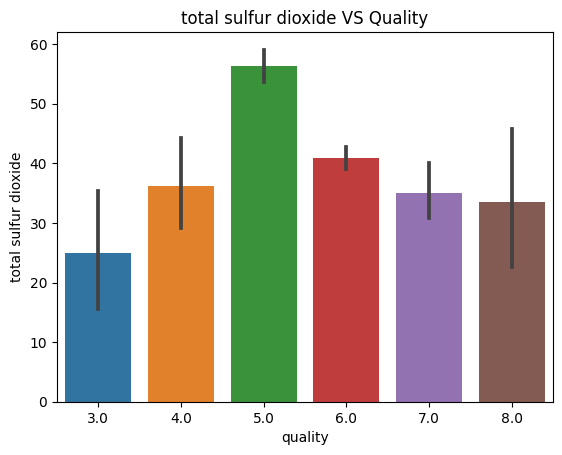

In [ ]:
#total sulfur dioxide VS Quality
plot=plt.figure()
plt.title('total sulfur dioxide VS Quality')
sns.barplot(x='quality',y='total sulfur dioxide',data=new_dataset)

<Axes: title={'center': 'density VS Quality'}, xlabel='quality', ylabel='density'>

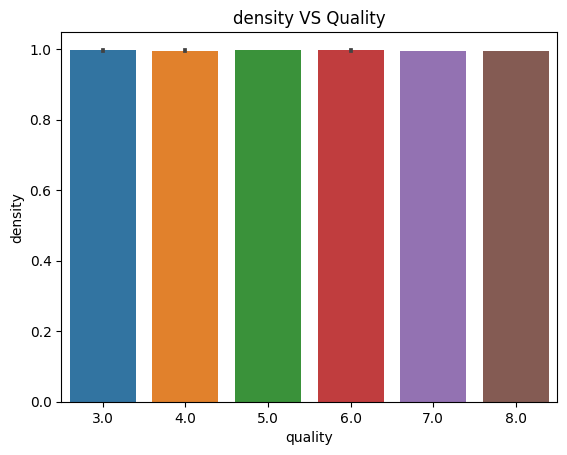

In [ ]:
#density VS Quality
plot=plt.figure()
plt.title('density VS Quality')
sns.barplot(x='quality',y='density',data=new_dataset)

<Axes: title={'center': 'pH VS Quality'}, xlabel='quality', ylabel='pH'>

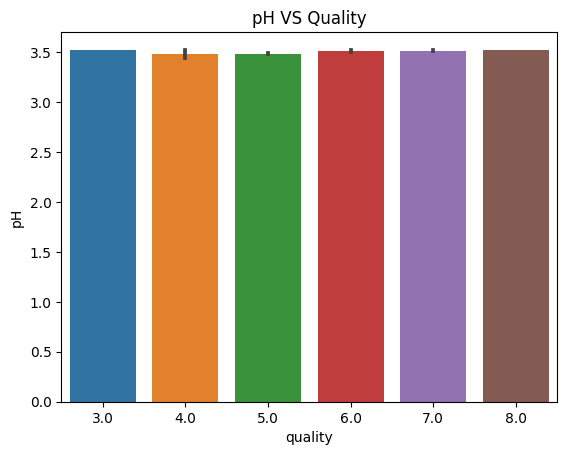

In [ ]:
#pH VS Quality
plot=plt.figure()
plt.title('pH VS Quality')
sns.barplot(x='quality',y='pH',data=new_dataset)

<Axes: title={'center': 'Sulphates VS Quality'}, xlabel='quality', ylabel='sulphates'>

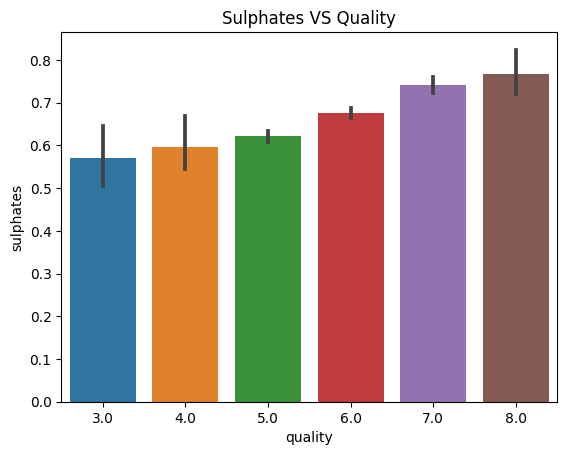

In [ ]:
#Sulphates VS Quality
plot=plt.figure()
plt.title('Sulphates VS Quality')
sns.barplot(x='quality',y='sulphates',data=new_dataset)

<Axes: title={'center': 'alcohol VS Quality'}, xlabel='quality', ylabel='alcohol'>

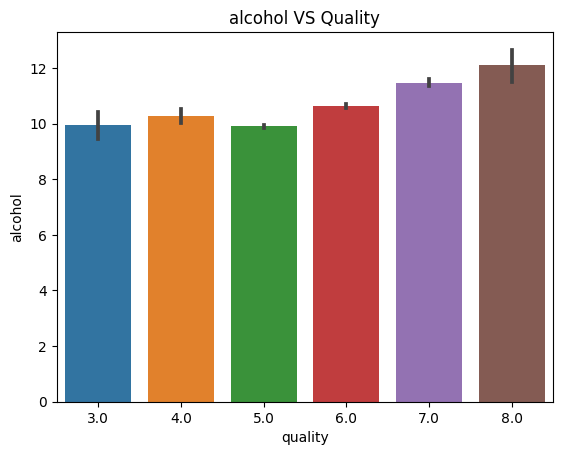

In [ ]:
#alcohol VS Quality
plot=plt.figure()
plt.title('alcohol VS Quality')
sns.barplot(x='quality',y='alcohol',data=new_dataset)

##Visulazing the correlation with the help of heatmap

<Axes: >

<Figure size 640x480 with 0 Axes>

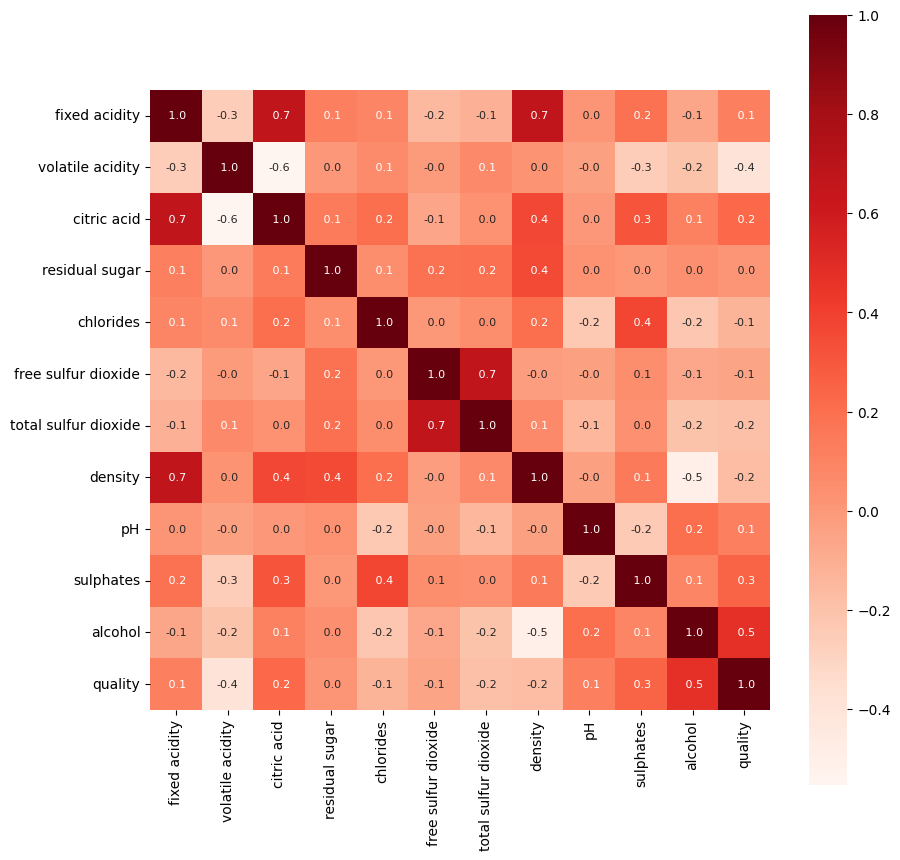

In [ ]:
correlation = new_dataset.corr()
plt.figure()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=' .1f', annot=True, annot_kws={'size':8}, cmap='Reds')

##**REGRESSION**

##Training the Linear Regression model on the Training set

In [ ]:
X=new_dataset.iloc[:,:-1].values
Y=new_dataset.iloc[:,-1].values

###Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc1 = sc1.fit(X_train)

###Training the Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

###Predicting the Test set results

In [ ]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[6. 5.]
 [5. 6.]
 [6. 6.]
 [6. 6.]
 [7. 6.]
 [6. 6.]
 [6. 6.]
 [5. 5.]
 [6. 5.]
 [5. 5.]
 [6. 6.]
 [5. 6.]
 [6. 6.]
 [6. 6.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [6. 5.]
 [5. 5.]
 [6. 6.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 6.]
 [6. 6.]
 [6. 6.]
 [6. 6.]
 [5. 6.]
 [6. 7.]
 [5. 6.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [5. 7.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [6. 5.]
 [5. 4.]
 [6. 7.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [6. 6.]
 [6. 6.]
 [6. 5.]
 [5. 5.]
 [6. 5.]
 [5. 6.]
 [5. 5.]
 [5. 6.]
 [5. 5.]
 [6. 6.]
 [7. 7.]
 [6. 6.]
 [6. 6.]
 [6. 6.]
 [5. 5.]
 [6. 6.]
 [6. 6.]
 [6. 6.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [5. 6.]
 [6. 5.]
 [6. 6.]
 [6. 5.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [6. 5.]
 [5. 5.]
 [5. 5.]
 [6. 7.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [6. 7.]
 [5. 5.]
 [6. 6.]
 [6. 5.]
 [5. 5.]
 [6. 6.]
 [5. 5.]
 [5. 3.]
 [6. 6.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [6. 6.]
 [5. 6.]
 [6. 5.]
 [6. 6.]
 [7. 7.]
 

###Calculating the mean_squared_error & r2_Score

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

scores= f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,regressor.predict(X_train))}\t{r2_score(Y_test,regressor.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,regressor.predict(X_train))}\t{mse(Y_test, regressor.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.36940946267826613	0.3152538349484192
MSE       0.42340637752770394	0.3895496859871078



##**CLASSIFICATION**

##Separating the data

In [ ]:
x=new_dataset.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

*   **To have a balanced categorical data rating is separated between 5 and 6 as Bad and Good quality red wine**
*   **Considering quality of wine of rating 6 and above as GOOD and below as bad, a column is build where 6 and above rating indicating as '1' which means 'GOOD quality wine' and rest as '0' representing 'BAD quality wine'**





In [ ]:
y=new_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
print(y)
y.value_counts()

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


1    855
0    744
Name: quality, dtype: int64

##Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x_train, y_train)

LogisticRegression(random_state=0)

###Predicting the Test set results

In [ ]:
y_pred1 = classifier1.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[112  42]
 [ 42 124]]


0.7375

##Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
classifier2.fit(x_train, y_train)

KNeighborsClassifier()

###Predicting the Test set results

In [ ]:
y_pred2 = classifier2.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[107  47]
 [ 44 122]]


0.715625

##Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

###Predicting the Test set results

In [ ]:
y_pred3 = classifier3.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[117  37]
 [ 47 119]]


0.7375

##Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(x_train, y_train)

SVC(random_state=0)

###Predicting the Test set results

In [ ]:
y_pred4 = classifier4.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_test, y_pred4)

[[116  38]
 [ 47 119]]


0.734375

##Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(x_train, y_train)

GaussianNB()

###Predicting the Test set results

In [ ]:
y_pred5 = classifier5.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
accuracy_score(y_test, y_pred5)

[[108  46]
 [ 39 127]]


0.734375

##Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

###Predicting the Test set results

In [ ]:
y_pred6 = classifier6.predict(x_test)

###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
accuracy_score(y_test, y_pred6)

[[110  44]
 [ 42 124]]


0.73125

##Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier7.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

###Predicting the Test set results

In [ ]:
y_pred7 = classifier7.predict(x_test)
print(y_pred7)

[0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1]


###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
accuracy_score(y_test, y_pred7)

[[120  34]
 [ 29 137]]


0.803125

##Building a predictive system

**Since accuracy score of random forest is highest, a predictive system is build in accordance of this model**

In [ ]:
input_data=(7.8,0.645,0,2,0.082,8,16,0.9964,3.38,0.59,9.8)
input_data1=np.asarray(input_data)
input_data2=input_data1.reshape(1,-1)
prediction=classifier7.predict(input_data2)
print(prediction)
if(prediction[0]==1):
  print('Good Quality Wine')
else: print('Bad Quality Wine')

[1]
Good Quality Wine
